# importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("netflix_titles.csv") #loading the dataset

# initial Inspection

In [4]:
dataset.head() #starting five rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
dataset.info() #to know data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Handling Missing values

In [11]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
dataset = dataset.dropna() #drops the rows with missing values

In [17]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
dataset = dataset.drop_duplicates() #for duplicates


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [20]:
# Renaming all columns to lowercase and replace spaces with underscores
dataset.columns = dataset.columns.str.lower().str.replace(" ", "_")


In [21]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# Standardizing Text Data



In [28]:
dataset["title"] = dataset['title'].str.lower().str.strip()
dataset["director"] = dataset['director'].str.lower().str.strip()
dataset["cast"] = dataset['cast'].str.lower().str.strip()
dataset["country"] = dataset['country'].str.lower().str.strip()
dataset["listed_in"] = dataset['listed_in'].str.lower().str.strip()
dataset["description"] = dataset['description'].str.lower().str.strip()
dataset['type'] = dataset['type'].str.lower().str.strip()

In [29]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,movie,zinzana,majid al ansari,"ali suliman, saleh bakri, yasa, ali al-jabri, ...","united arab emirates, jordan","March 9, 2016",2015,TV-MA,96 min,"dramas, international movies, thrillers",recovering alcoholic talal wakes up inside a s...
8802,s8803,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,"November 20, 2019",2007,R,158 min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
8804,s8805,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,"November 1, 2019",2009,R,88 min,"comedies, horror movies",looking to survive in a world taken over by zo...
8805,s8806,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,"January 11, 2020",2006,PG,88 min,"children & family movies, comedies","dragged from civilian life, a former superhero..."
8806,s8807,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,"March 2, 2019",2015,TV-14,111 min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [33]:
# Convert to consistent datetime format
dataset['date_added'] = pd.to_datetime(dataset['date_added'],errors='coerce', dayfirst=True)

In [38]:
print(dataset.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [39]:
# Fill missing values
dataset['director'] = dataset['director'].fillna('Unknown')
dataset['cast'] = dataset['cast'].fillna('Unknown')
dataset['country'] =dataset['country'].fillna('Unknown')

# Standardize country names (e.g., lowercase)
dataset['country'] = dataset['country'].str.lower().str.strip()

# Clean rating column (optional: check for inconsistencies)
dataset['rating'] =dataset['rating'].str.strip()

# Optional: split 'duration' into 'duration_int' and 'duration_type'
dataset[['duration_int', 'duration_type']] = dataset['duration'].str.extract(r'(\d+)\s*(\w+)')


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        5332 non-null   object        
 1   type           5332 non-null   object        
 2   title          5332 non-null   object        
 3   director       5332 non-null   object        
 4   cast           5332 non-null   object        
 5   country        5332 non-null   object        
 6   date_added     5332 non-null   datetime64[ns]
 7   release_year   5332 non-null   int64         
 8   rating         5332 non-null   object        
 9   duration       5332 non-null   object        
 10  listed_in      5332 non-null   object        
 11  description    5332 non-null   object        
 12  duration_int   5332 non-null   object        
 13  duration_type  5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 624.8+ KB


In [43]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
7,s8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s...",125,min
8,s9,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...,9,Seasons
9,s10,movie,the starling,theodore melfi,"melissa mccarthy, chris o'dowd, kevin kline, t...",united states,2021-09-24,2021,PG-13,104 min,"comedies, dramas",a woman adjusting to life after a loss contend...,104,min
12,s13,movie,je suis karl,christian schwochow,"luna wedler, jannis niewöhner, milan peschel, ...","germany, czech republic",2021-09-23,2021,TV-MA,127 min,"dramas, international movies",after most of her family is murdered in a terr...,127,min
24,s25,movie,jeans,s. shankar,"prashanth, aishwarya rai bachchan, sri lakshmi...",india,2021-09-21,1998,TV-14,166 min,"comedies, international movies, romantic movies",when the father of the man she loves insists t...,166,min


In [45]:
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     0
duration_type    0
dtype: int64

In [46]:
dataset.to_csv("cleaned_netflix_dataset.csv", index=False)

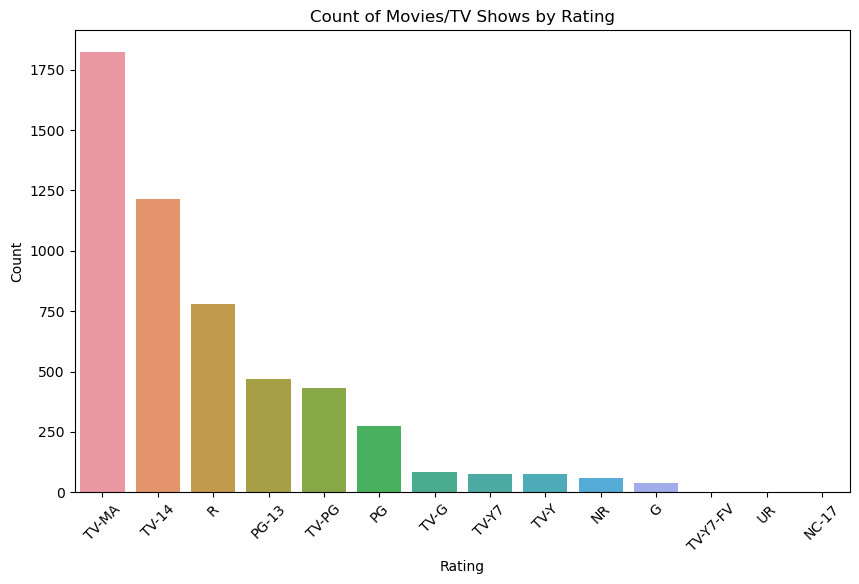

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='rating', order=dataset['rating'].value_counts().index)
plt.title('Count of Movies/TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


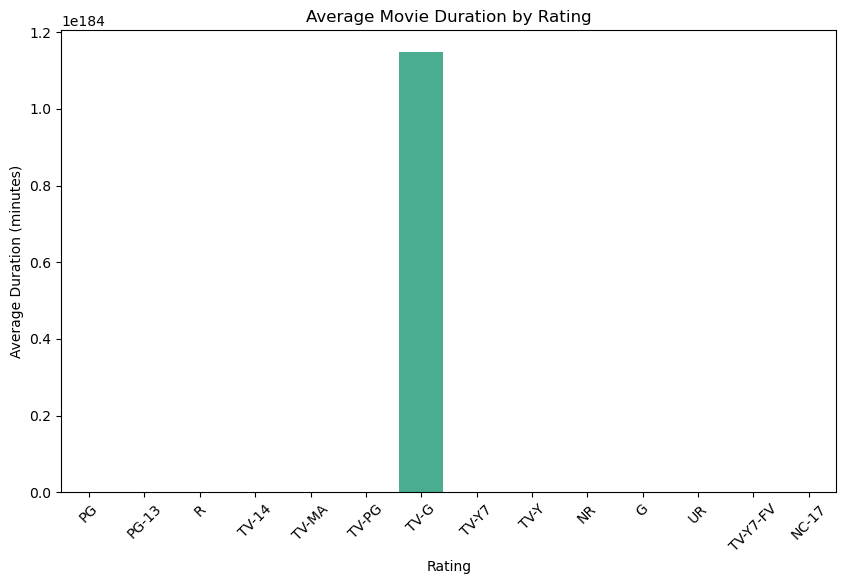

In [57]:
movie_dataset = dataset[dataset['duration_type'] == 'min']

avg_duration = movie_dataset.groupby('rating')['duration_int'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration.index, y=avg_duration.values)
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


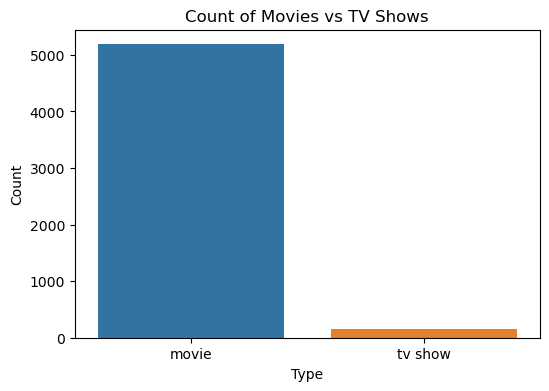

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
